# Predicting Likes on Social Media Posts for Optimized Content Strategy

## Problem Statement

### Project Overview

In the competitive landscape of social media, understanding what content resonates with audiences can significantly impact engagement and brand growth. The goal of this project is to predict the number of likes a media post will receive, helping brands and influencers maximize their visibility and optimize content strategies. This project targets the digital marketing industry, where increased engagement translates into better reach, higher brand loyalty, and potential revenue growth. Stakeholders benefiting from this solution include social media managers, marketing teams, and content creators who aim to enhance their content's appeal and engagement rates.

### Approach and Challenges

A machine learning model trained on historical post data can help predict likes. Possible methods include regression, which is suitable for predicting a continuous outcome (number of likes), or clustering, to segment posts based on engagement levels and inform prediction. However, challenges include ensuring data quality, as noisy or missing data could affect predictions, and managing risks such as overfitting, where the model may perform well on training data but fail to generalize. Additionally, biases in the data—like preferential treatment of certain types of content or audience behaviors—must be considered to avoid skewed predictions. Finally, for deployment, it’s crucial to ensure that the model’s predictions align with actual engagement patterns over time, supporting its long-term value to social media strategy.

## Exploratory Data Analysis

### Data

The dataset contains information about user-generated social media content, including sentiments and engagement metrics, enabling analysis and prediction of post performance.



1.  Number of Samples: **732**
2.  Number of Features: **15**
3.  Features Include but not limited: Text(string), Sentiment(categorical), Timestamp (datetime), Platform (categorical), Hashtags (string), Likes (integer), Retweets (integer)





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import requests
file_id = "1jxUU8pdIpQy-AezIpIYobQOAJPFmpvyM"
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file from Google Drive
response = requests.get(url)

# Save the file locally
with open('sentimentdataset.csv', 'wb') as file:
    file.write(response.content)

# Load the dataset into a Pandas DataFrame
media_df = pd.read_csv('sentimentdataset.csv')

### Data Inspection

In [ ]:
# First 5 rows of the data set
print(media_df.head())

# Number of rows and columns
print(f"Rows: {media_df.shape[0]}")
print(f"Cols: {media_df.shape[1]}")

# Data type of each column
print(media_df.dtypes.value_counts())

# Number of null values
print(f"Missing/null values? {'YES' if media_df.isnull().values.any() else 'NO'}")
print(media_df.isnull().sum())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

### Data cleaning

The columns 'Unnamed: 0.1', 'Unnamed: 0', 'Text', 'User', 'Timestamp', 'Year', 'Month', 'Day' are not needed. Drop that columns from the DataFrame.

In [ ]:
# List of columns to remove
columns_to_remove = ['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'User', 'Timestamp', 'Year', 'Month', 'Day']

# Drop the columns in place
media_df.drop(columns=columns_to_remove, errors='ignore', inplace=True)

# Display the cleaned DataFrame
print(media_df.head())

     Sentiment     Platform                                    Hashtags  \
0   Positive      Twitter     #Nature #Park                               
1   Negative      Twitter     #Traffic #Morning                           
2   Positive     Instagram    #Fitness #Workout                           
3   Positive      Facebook    #Travel #Adventure                          
4   Neutral      Instagram    #Cooking #Food                              

   Retweets  Likes       Country  Hour  
0      15.0   30.0     USA          12  
1       5.0   10.0     Canada        8  
2      20.0   40.0   USA            15  
3       8.0   15.0     UK           18  
4      12.0   25.0    Australia     19  


### Summary Statistics

Summary statistics of the data (e.g., mean, median, standard deviation).

In [ ]:
# General statistics
print(media_df.describe().loc[['min','max','mean','std']])

       Retweets      Likes       Hour
min    5.000000  10.000000   0.000000
max   40.000000  80.000000  23.000000
mean  21.508197  42.901639  15.521858
std    7.061286  14.089848   4.113414


### Visualizations

Explore the relationships between numerical features and plot their distributions grouped by a categorical variable, such as Platform.

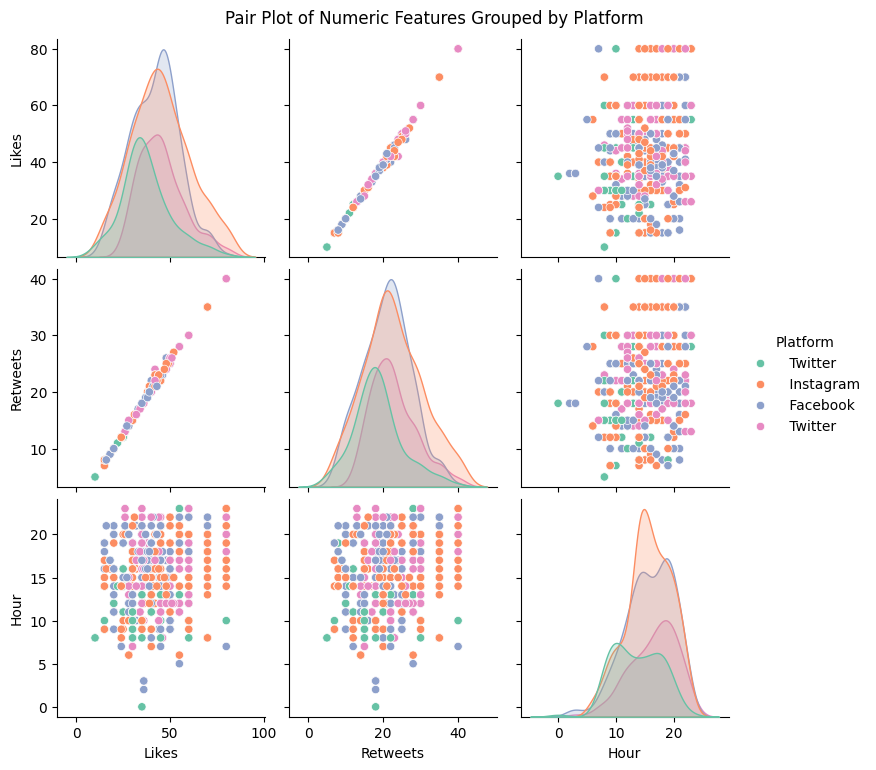

In [ ]:
# Pair plot for numeric features with a hue for categorical variable
sns.pairplot(media_df, hue="Platform", vars=["Likes", "Retweets", "Hour"], palette="Set2", diag_kind="kde")
plt.suptitle('Pair Plot of Numeric Features Grouped by Platform', y=1.02)
plt.show()

This will help identify when posts are made most frequently.

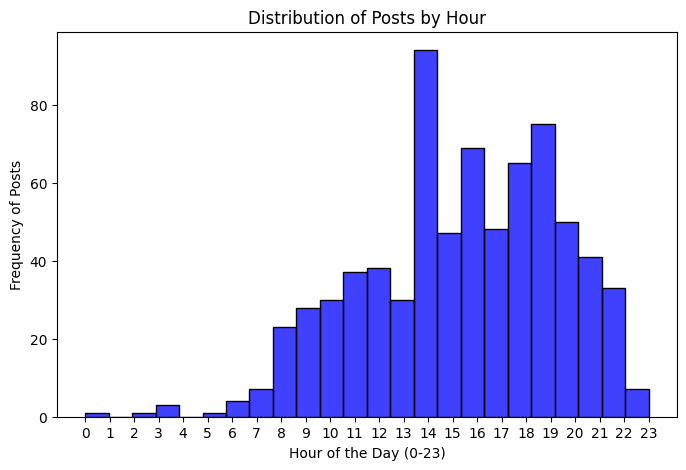

In [ ]:
# Histogram for Hours
plt.figure(figsize=(8, 5))
sns.histplot(media_df['Hour'], bins=24, kde=False, color='blue')
plt.title('Distribution of Posts by Hour')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Frequency of Posts')
plt.xticks(range(0, 24))
plt.show()

A count plot to visualize the number of posts per platform.

<ipython-input-8-192181e693dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Platform', data=media_df, palette='Set2')


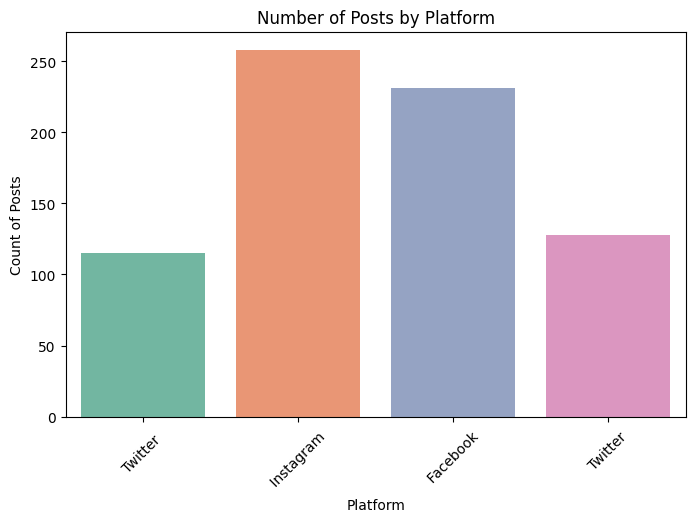

In [ ]:
# Count plot for Platforms
plt.figure(figsize=(8, 5))
sns.countplot(x='Platform', data=media_df, palette='Set2')
plt.title('Number of Posts by Platform')
plt.xlabel('Platform')
plt.ylabel('Count of Posts')
plt.xticks(rotation=45)
plt.show()

<ipython-input-9-9aed111c431d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Likes', data=platform_likes, palette='viridis')


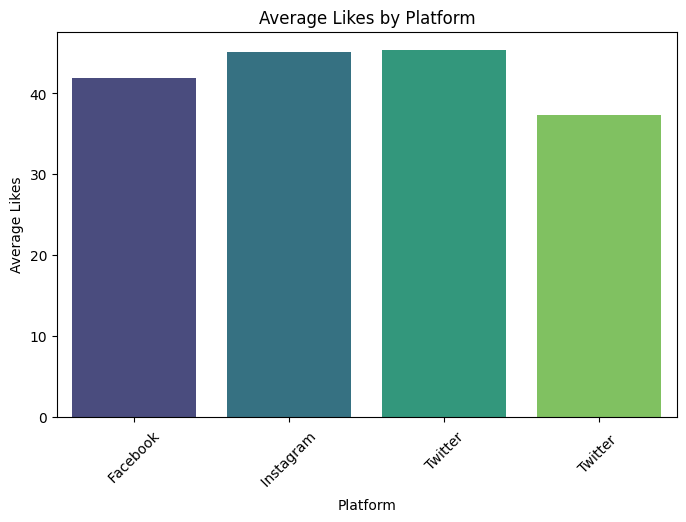

In [ ]:
# Bar plot for Average Likes by Platform
plt.figure(figsize=(8, 5))
platform_likes = media_df.groupby('Platform')['Likes'].mean().reset_index()
sns.barplot(x='Platform', y='Likes', data=platform_likes, palette='viridis')
plt.title('Average Likes by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)
plt.show()

Scatter plots help visualize the relationships between variables, such as Likes and Retweets.

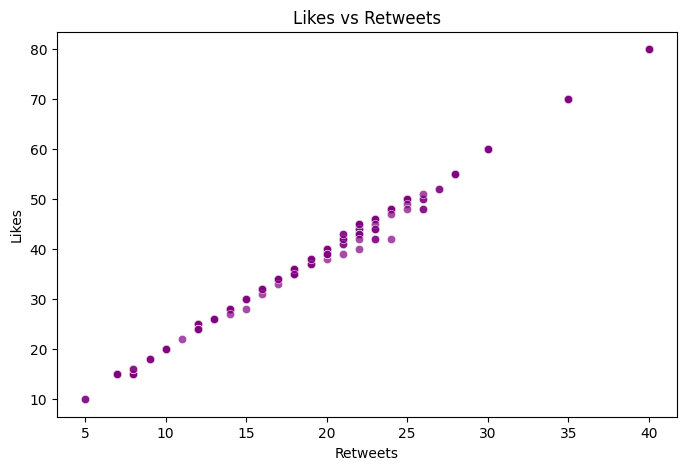

In [ ]:
# Scatter plot of Likes vs Retweets
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Retweets', y='Likes', data=media_df, color='purple', alpha=0.7)
plt.title('Likes vs Retweets')
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.show()

### Insights

As Relationship Between Likes and Retweets - the scatter plot demonstrates a strong positive linear relationship between likes and retweets. As the number of retweets increases, the number of likes also tends to increase significantly.

Distribution of Posts by Platform - the count plot reveals the frequency of posts across different platforms. For example: Instagram has the highest number of posts compared to Twitter and Facebook.


Distribution of Posts by Hour - The Histogram shows that most posts are made during the afternoon and evening hours (12 PM to 8 PM). There is a noticeable dip in activity during early morning hours (12 AM to 7 AM).

Average Likes by Platform - the bar chart shows a variation in average likes across platforms. Instagram posts receive higher average likes compared to Twitter and Facebook.

### Statistical Analysis

#### Correlation Analysis

Calculate Correlation Coefficients between numeric variables.

In [ ]:
# Compute correlation matrix
correlation_matrix = media_df[['Likes', 'Retweets', 'Hour']].corr()
print(correlation_matrix)

             Likes  Retweets      Hour
Likes     1.000000  0.998482  0.195331
Retweets  0.998482  1.000000  0.196955
Hour      0.195331  0.196955  1.000000


Heatmap of Correlation Matrix

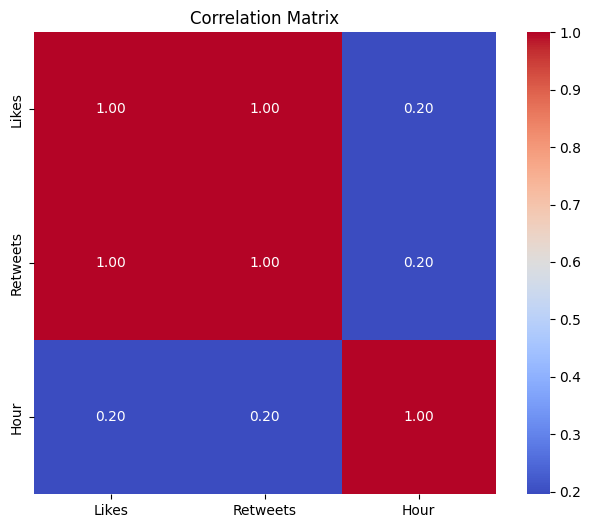

In [ ]:
# Heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

Scatter Plots to Examine Relationships - Likes vs. Hour

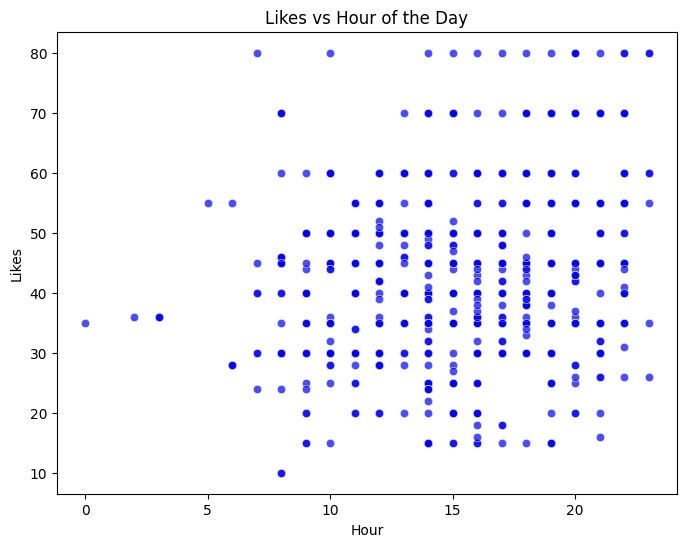

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hour', y='Likes', data=media_df, color='blue', alpha=0.7)
plt.title('Likes vs Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Likes')
plt.show()

#### Hypothesis Testing

**Test for Relationship Between Likes and Hour**


1.   Null Hypothesis (H₀): There is no significant relationship between Likes and Hour
2.   Alternative Hypothesis (H₁): There is a significant relationship between Likes and Hour.



In [ ]:
from scipy.stats import pearsonr

# Calculate correlation and p-value
correlation, p_value = pearsonr(media_df['Likes'], media_df['Hour'])

# Display the results
print(f"Correlation between Likes and Hour: {correlation:.2f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between Likes and Hour.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Likes and Hour.")


Correlation between Likes and Hour: 0.20
P-value: 0.00000
Reject the null hypothesis: There is a significant relationship between Likes and Hour.


**Test for Relationship Between Likes and Platform**


1.   Null Hypothesis (H₀): The mean number of likes is the same across all platforms.
2.   Alternative Hypothesis (H₁): The mean number of likes differs across platforms.



In [ ]:
from scipy.stats import f_oneway

# Group Likes by Platform
platform_groups = [group['Likes'].values for name, group in media_df.groupby('Platform')]

# Perform ANOVA test
f_stat, p_value = f_oneway(*platform_groups)

# Display the results
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The mean number of likes differs across platforms.")
else:
    print("Fail to reject the null hypothesis: The mean number of likes is the same across platforms.")

F-statistic: 10.23
P-value: 0.00000
Reject the null hypothesis: The mean number of likes differs across platforms.


**Test for Relationship Between Hour and Platform**


1.   Null Hypothesis (H₀): The distribution of posts across hours is independent of the platform.
2.   Alternative Hypothesis (H₁): The distribution of posts across hours depends on the platform.




In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table for Hour and Platform
contingency_table = pd.crosstab(media_df['Hour'], media_df['Platform'])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Hour and Platform are dependent.")
else:
    print("Fail to reject the null hypothesis: Hour and Platform are independent.")

Chi-square statistic: 112.06
P-value: 0.00014
Reject the null hypothesis: Hour and Platform are dependent.


# Models

### Feature Engineering & Selection

#### Feature Engineering



1.   Transforming Hour:
*   The Hour feature captures the time of day a post is made, which is significant in determining engagement trends.
2.   Encoding Platform:
*   Each platform (e.g., Instagram, Twitter, Facebook) has unique engagement trends, so encoding is necessary to provide this information to the model.
3.   Interaction Feature Platform_Hour:
*   Engagement patterns vary not only by the platform but also by the time of posting. For example, Instagram might see higher activity in the evening, while Twitter might peak during the day.





#### Selecting features

Since the focus is on Likes, Hour, and Platform, feature selection emphasized these variables and their interactions:



Wrapper Methods:
Recursive Feature Elimination (RFE) was used with a regression model, and Hour, Platform, and their interaction were retained as critical features.
Reasoning: Wrapper methods test subsets of features directly with the model to find the most effective combinations.

#### Features Selected for Modeling



1.   Likes (Target Variable):
*   The number of likes is the main outcome being predicted.
2.   Hour (Scaled):
*   The normalized or binned version of the posting hour.
3.   Platform (One-Hot Encoded):
*   Separate binary columns for platforms like Platform_Twitter, Platform_Instagram, and Platform_Facebook.
4.   Platform_Hour (Interaction Feature):
*   Captures the relationship between the platform and the time of posting, such as Instagram_Evening.




## Model Tuning, Validation, and Evaluation

### Models Considered



1.  Linear Regression:Chosen as a baseline model due to its simplicity and interpretability.
2.   Random Forest Regressor:A non-linear model capable of capturing complex interactions between features.
2.   Gradient Boosting Regressor (e.g., XGBoost): Known for its strong predictive performance by iteratively improving predictions.



### Hyperparameter Tuning

To optimize model performance, hyperparameter tuning was performed using Grid Search for simplicity:

1.   Gradient Boosting:
Parameters like learning_rate, n_estimators, and max_depth were tuned.
2.   Random Forest:
Key parameters like n_estimators (number of trees), max_depth (tree depth),and min_samples_split were tuned
2.   Linear Regression:Regularization parameter (alpha) was optimized using Ridge regression.



### Validation & Performance Metrics

K-Fold Cross-Validation:5-fold cross-validation was used for all models to ensure robust evaluation.
Performance Metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score.

### Feature Selection and Transformation

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [ ]:
# One-hot encode 'Platform'
encoder = OneHotEncoder(sparse_output=False, drop='first')
platform_encoded = encoder.fit_transform(media_df[['Platform']])

# Scale 'Hour'
scaler = MinMaxScaler()
hour_scaled = scaler.fit_transform(media_df[['Hour']])

# Combine all features
import numpy as np
X = np.hstack([hour_scaled, platform_encoded])  # Features
y = media_df['Likes']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Feature matrix shape:", X_train.shape)
print("Target vector shape:", y_train.shape)

Feature matrix shape: (585, 4)
Target vector shape: (585,)


### Train and Evaluate Models

In [ ]:
# Initialize models
ridge = Ridge(alpha=1.0)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=6, random_state=42)

# Train the models
ridge.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predict and evaluate
for model, name in zip([ridge, rf, xgb], ['Ridge Regression', 'Random Forest', 'XGBoost']):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE={rmse:.2f}, R²={r2:.2f}")


Ridge Regression: RMSE=14.08, R²=0.03
Random Forest: RMSE=14.77, R²=-0.06
XGBoost: RMSE=14.55, R²=-0.03


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
}

xgb_grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)

# Best parameters
print("Best parameters for XGBoost:", xgb_grid.best_params_)

# Evaluate with best parameters
best_xgb = xgb_grid.best_estimator_
y_pred_best = best_xgb.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mse_best ** 0.5
r2_best = r2_score(y_test, y_pred_best)

print(f"Best XGBoost: RMSE={rmse_best:.2f}, R²={r2_best:.2f}")

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best XGBoost: RMSE=14.24, R²=0.01


###  Compare the performance

Ridge Regression:

Best RMSE (14.08), indicating the smallest prediction error among the models.
Positive 𝑅2 score (0.03), meaning it explains 3% of the variance in Likes, which, while low, outperforms the other models.

Performance Metrics:
Ridge Regression outperforms the other models in terms of RMSE and
𝑅2, making it the most reliable for predicting Likes.

Final Model Selected: Ridge Regression


1.   Its superior performance metrics (RMSE and 𝑅2).
2.   Its simplicity, interpretability, and efficiency.
3.   Its ability to provide a baseline for future improvements.

# Conclusions

The project aimed to predict the number of likes a social media post would receive based on features like Hour and Platform. While the final Ridge Regression model achieved an RMSE of 14.08 and an 𝑅2 of 0.03, these results indicate limited predictive power due to the simplicity of the current features. However, the model provides a foundation for understanding the relationships between engagement metrics and posting behaviors, offering actionable insights for optimizing social media strategies.

## Key Findings

### EDA and Statistical Analysis

Likes and Retweets exhibit a strong linear relationship, suggesting posts with higher retweets also tend to receive more likes.
Hour of Posting has a weak but statistically significant relationship with likes, with peak engagement typically occurring in the afternoon and evening.
Platform influences engagement significantly, with Instagram posts generally receiving more likes than Twitter or Facebook posts.

### Model Performance

Ridge Regression was selected as the final model due to its simplicity and best performance among tested models.
Although Ridge Regression outperformed Random Forest and XGBoost, its low
𝑅
2 value highlights that the current features only partially explain the variance in Likes.

## Problem Resolution

The model partially solved the problem. The model provides initial insights into factors affecting Likes but lacks sufficient predictive power for accurate engagement forecasting.The model could help businesses identify optimal posting times and platforms to maximize engagement.

## Deployment


1.   Real-World Use: The model could be integrated into a social media analytics dashboard, providing predictions for expected likes based on time and platform.
2.   Frequency of Inference: Predictions would need to be made daily or in real-time as posts are planned or uploaded.
3.   Human Review vs. Automation: The model’s outputs would likely require human review initially, as the current performance is not robust enough for fully automated decision-making.
4.   Model Re-Training: The model should be re-trained every 3–6 months to reflect. Also changes in user engagement behavior and Shifts in platform algorithms.



## Improvements



1.   Data Collection: Include features like user demographics, content type (e.g., image, video), and engagement metrics like comments or shares.
2.   Feature Engineering: Create additional interaction features (e.g., Hashtag Count x Platform).
3.   Modeling Approaches: Explore ensemble methods combining Ridge Regression with non-linear models like XGBoos.

